In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib import pyplot as plt
import seaborn as sn

from sklearn.preprocessing import MinMaxScaler

In [12]:
dataset = pd.read_csv('dataset.csv', index_col=0)

dataset.head()

,date,symbol,econ_branch,score,year,month,day,close,roi_month,roi_quarter,roi_halfyear,roi_year
0,2004-02-11,SU,Energy Minerals,0.953727,2004,2,11,13.285000,0.015807,-0.085058,0.048927,0.406473
1,2004-02-11,GGG,Producer Manufacturing,0.952753,2004,2,11,9.388889,-0.048047,-0.010888,0.087811,0.348402
2,2004-02-11,CWT,Utilities,0.934181,2004,2,11,14.720000,-0.002717,-0.068954,-0.070992,0.178668
3,2004-02-11,BLL,Process Industries,0.922862,2004,2,11,8.095000,0.006640,-0.023935,0.124923,0.361334
4,2004-02-11,APA,Energy Minerals,0.912117,2004,2,11,39.830002,0.008034,0.025860,0.082350,0.442882


In [13]:
dataset_prices = dataset
for roi in ['roi_month', 'roi_quarter', 'roi_halfyear', 'roi_year']:
    dataset_prices['price_'+roi[4:]] = dataset_prices['close']*(dataset_prices[roi]+1)
dataset_prices

,date,symbol,econ_branch,score,year,month,day,close,roi_month,roi_quarter,roi_halfyear,roi_year,price_month,price_quarter,price_halfyear,price_year
0,2004-02-11,SU,Energy Minerals,0.953727,2004,2,11,13.285000,0.015807,-0.085058,0.048927,0.406473,13.495000,12.155000,13.935000,18.684999
1,2004-02-11,GGG,Producer Manufacturing,0.952753,2004,2,11,9.388889,-0.048047,-0.010888,0.087811,0.348402,8.937778,9.286667,10.213333,12.660000
2,2004-02-11,CWT,Utilities,0.934181,2004,2,11,14.720000,-0.002717,-0.068954,-0.070992,0.178668,14.680000,13.705000,13.675000,17.350000
3,2004-02-11,BLL,Process Industries,0.922862,2004,2,11,8.095000,0.006640,-0.023935,0.124923,0.361334,8.148750,7.901250,9.106250,11.020000
4,2004-02-11,APA,Energy Minerals,0.912117,2004,2,11,39.830002,0.008034,0.025860,0.082350,0.442882,40.150002,40.860001,43.110001,57.470001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10405,2021-04-07,RPM,Process Industries,0.657795,2021,4,7,90.209999,0.080479,0.007538,-0.115397,-0.042013,97.470001,90.889999,79.800003,86.419998
10406,2021-04-07,AZO,Retail Trade,0.651998,2021,4,7,1423.270020,0.058970,0.088543,0.183001,0.514533,1507.199951,1549.290039,1683.729980,2155.590088
10407,2021-04-07,QRVO,Electronic Technology,0.650983,2021,4,7,193.690002,-0.049099,-0.008725,-0.146420,-0.409830,184.179993,192.000000,165.330002,114.309998
10408,2021-04-07,PHM,Consumer Durables,0.646593,2021,4,7,53.529999,0.153185,0.029516,-0.109658,-0.248085,61.730000,55.110001,47.660000,40.250000


In [14]:
dataset_prices["day_sin"] = np.sin(2*np.pi*dataset_prices["day"]/31)
dataset_prices["day_cos"] = np.cos(2*np.pi*dataset_prices["day"]/31)
dataset_prices["month_sin"] = np.sin(2*np.pi*dataset_prices["month"]/12)
dataset_prices["month_cos"] = np.cos(2*np.pi*dataset_prices["month"]/12)
dataset_prices["year_sin"] = np.sin(2*np.pi*(dataset_prices["year"]-2003)/2022)
dataset_prices["year_cos"] = np.cos(2*np.pi*(dataset_prices["year"]-2003)/2022)
dataset_prices["sin_log_close"] = np.sin(np.log(dataset_prices["close"]))
dataset_prices["cube_log_score"] = np.square(np.log(dataset_prices["score"]))
# dataset_prices["reciprocal_log_close"] = np.reciprocal(np.log(dataset_prices["close"]))
# dataset_prices["sin_cos_year"] = np.sin(np.cos(dataset_prices["year"]))
# dataset_prices["sin_reciprocal_close"] = np.sin(np.reciprocal(dataset_prices["close"]))
# dataset_prices["reciprocal_cube_score"] = np.reciprocal(np.power(dataset_prices["close"], 3))

dataset_prices = dataset_prices.drop("close", axis=1)
dataset_prices = dataset_prices.drop("score", axis=1)
dataset_prices = dataset_prices.drop("day", axis=1)
dataset_prices = dataset_prices.drop("month", axis=1)
dataset_prices = dataset_prices.drop("year", axis=1)
dataset_prices

,date,symbol,econ_branch,roi_month,roi_quarter,roi_halfyear,roi_year,price_month,price_quarter,price_halfyear,price_year,day_sin,day_cos,month_sin,month_cos,year_sin,year_cos,sin_log_close,cube_log_score
0,2004-02-11,SU,Energy Minerals,0.015807,-0.085058,0.048927,0.406473,13.495000,12.155000,13.935000,18.684999,0.790776,-0.612106,0.866025,0.5,0.003107,0.999995,0.526907,0.002245
1,2004-02-11,GGG,Producer Manufacturing,-0.048047,-0.010888,0.087811,0.348402,8.937778,9.286667,10.213333,12.660000,0.790776,-0.612106,0.866025,0.5,0.003107,0.999995,0.784609,0.002343
2,2004-02-11,CWT,Utilities,-0.002717,-0.068954,-0.070992,0.178668,14.680000,13.705000,13.675000,17.350000,0.790776,-0.612106,0.866025,0.5,0.003107,0.999995,0.437112,0.004636
3,2004-02-11,BLL,Process Industries,0.006640,-0.023935,0.124923,0.361334,8.148750,7.901250,9.106250,11.020000,0.790776,-0.612106,0.866025,0.5,0.003107,0.999995,0.867595,0.006444
4,2004-02-11,APA,Energy Minerals,0.008034,0.025860,0.082350,0.442882,40.150002,40.860001,43.110001,57.470001,0.790776,-0.612106,0.866025,0.5,0.003107,0.999995,-0.516731,0.008462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10405,2021-04-07,RPM,Process Industries,0.080479,0.007538,-0.115397,-0.042013,97.470001,90.889999,79.800003,86.419998,0.988468,0.151428,0.866025,-0.5,0.055904,0.998436,-0.977979,0.175446
10406,2021-04-07,AZO,Retail Trade,0.058970,0.088543,0.183001,0.514533,1507.199951,1549.290039,1683.729980,2155.590088,0.988468,0.151428,0.866025,-0.5,0.055904,0.998436,0.829117,0.182939
10407,2021-04-07,QRVO,Electronic Technology,-0.049099,-0.008725,-0.146420,-0.409830,184.179993,192.000000,165.330002,114.309998,0.988468,0.151428,0.866025,-0.5,0.055904,0.998436,-0.850495,0.184274
10408,2021-04-07,PHM,Consumer Durables,0.153185,0.029516,-0.109658,-0.248085,61.730000,55.110001,47.660000,40.250000,0.988468,0.151428,0.866025,-0.5,0.055904,0.998436,-0.743741,0.190129


In [15]:
X = dataset_prices[['symbol', 'econ_branch',
 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'year_sin', 'year_cos',
  'sin_log_close', 'cube_log_score']]
y = dataset_prices[['roi_month', 'roi_quarter', 'roi_halfyear', 'roi_year', 'price_month',
        'price_quarter', 'price_halfyear', 'price_year']]

In [16]:
X.columns, y.columns, X.shape, y.shape

(Index(['symbol', 'econ_branch', 'day_sin', 'day_cos', 'month_sin', 'month_cos',
        'year_sin', 'year_cos', 'sin_log_close', 'cube_log_score'],
       dtype='object'),
 Index(['roi_month', 'roi_quarter', 'roi_halfyear', 'roi_year', 'price_month',
        'price_quarter', 'price_halfyear', 'price_year'],
       dtype='object'),
 (10410, 10),
 (10410, 8))

In [17]:
dummies1 = pd.get_dummies(X[['econ_branch']], drop_first=True)
dummies2 = pd.get_dummies(X[['symbol']], drop_first=True)
X = pd.concat([X.drop(['econ_branch'],axis=1), dummies1],axis=1)
X = pd.concat([X.drop(['symbol'],axis=1), dummies2],axis=1)
X.shape

(10410, 1152)

In [18]:
y

,roi_month,roi_quarter,roi_halfyear,roi_year,price_month,price_quarter,price_halfyear,price_year
0,0.015807,-0.085058,0.048927,0.406473,13.495000,12.155000,13.935000,18.684999
1,-0.048047,-0.010888,0.087811,0.348402,8.937778,9.286667,10.213333,12.660000
2,-0.002717,-0.068954,-0.070992,0.178668,14.680000,13.705000,13.675000,17.350000
3,0.006640,-0.023935,0.124923,0.361334,8.148750,7.901250,9.106250,11.020000
4,0.008034,0.025860,0.082350,0.442882,40.150002,40.860001,43.110001,57.470001
...,...,...,...,...,...,...,...,...
10405,0.080479,0.007538,-0.115397,-0.042013,97.470001,90.889999,79.800003,86.419998
10406,0.058970,0.088543,0.183001,0.514533,1507.199951,1549.290039,1683.729980,2155.590088
10407,-0.049099,-0.008725,-0.146420,-0.409830,184.179993,192.000000,165.330002,114.309998
10408,0.153185,0.029516,-0.109658,-0.248085,61.730000,55.110001,47.660000,40.250000


We split the data into train and test with proportions 0.67 - 0.33

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
X["const"] = 1.0
X

,day_sin,day_cos,month_sin,month_cos,year_sin,year_cos,sin_log_close,cube_log_score,econ_branch_Communications,econ_branch_Consumer Durables,...,symbol_XEL,symbol_XLNX,symbol_XOM,symbol_XRAY,symbol_XRX,symbol_XYL,symbol_YUM,symbol_ZD,symbol_ZTS,const
0,0.790776,-0.612106,0.866025,0.5,0.003107,0.999995,0.526907,0.002245,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,0.790776,-0.612106,0.866025,0.5,0.003107,0.999995,0.784609,0.002343,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0.790776,-0.612106,0.866025,0.5,0.003107,0.999995,0.437112,0.004636,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0.790776,-0.612106,0.866025,0.5,0.003107,0.999995,0.867595,0.006444,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,0.790776,-0.612106,0.866025,0.5,0.003107,0.999995,-0.516731,0.008462,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10405,0.988468,0.151428,0.866025,-0.5,0.055904,0.998436,-0.977979,0.175446,0,0,...,0,0,0,0,0,0,0,0,0,1.0
10406,0.988468,0.151428,0.866025,-0.5,0.055904,0.998436,0.829117,0.182939,0,0,...,0,0,0,0,0,0,0,0,0,1.0
10407,0.988468,0.151428,0.866025,-0.5,0.055904,0.998436,-0.850495,0.184274,0,0,...,0,0,0,0,0,0,0,0,0,1.0
10408,0.988468,0.151428,0.866025,-0.5,0.055904,0.998436,-0.743741,0.190129,0,1,...,0,0,0,0,0,0,0,0,0,1.0


In [21]:
y_train

,roi_month,roi_quarter,roi_halfyear,roi_year,price_month,price_quarter,price_halfyear,price_year
3033,0.008192,-0.015862,0.079310,0.221022,57.840000,56.459999,61.919998,70.050003
8734,-0.044041,0.126943,0.093523,0.273057,36.900002,43.500000,42.209999,49.139999
4049,0.007254,0.077720,0.104663,0.006477,38.880001,41.599998,42.639999,38.849998
7283,0.004914,-0.008980,-0.027279,-0.225178,59.310001,58.490002,57.410000,45.730000
5265,-0.037806,-0.105114,-0.107080,-0.090253,44.029999,40.950001,40.860001,41.630001
...,...,...,...,...,...,...,...,...
5734,0.039870,0.094914,-0.023964,0.210339,99.370003,104.629997,93.269997,115.660004
5191,0.043577,0.055833,-0.064458,-0.137994,45.980000,46.520000,41.220001,37.980000
5390,0.085159,0.169285,0.255064,0.247830,52.500000,56.570000,60.720001,60.369999
860,-0.039411,-0.042682,-0.031889,-0.102208,14.685000,14.635000,14.800000,13.725000


In [22]:
X_train.shape, y_train.shape

((6974, 1152), (6974, 8))

In [23]:
#https://towardsdatascience.com/how-to-convert-pandas-dataframe-to-keras-rnn-and-back-to-pandas-for-multivariate-regression-dcc34c991df9

import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

In [116]:
y_cols = ['roi_month', 'roi_quarter', 'roi_halfyear', 'roi_year',
          'price_month', 'price_quarter', 'price_halfyear', 'price_year'
        ]
y_chosen = 'roi_year'
y_train_data = y_train[[y_chosen]]
y_test_data = y_test[[y_chosen]]

y_train_data.shape, y_test_data.shape

((6974, 1), (3436, 1))

In [117]:
Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(X_train)
scaled_X_train = Xscaler.transform(X_train)
scaled_X_test = Xscaler.transform(X_test)

Yscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Yscaler.fit(y_train_data)
scaled_y_train = Yscaler.transform(y_train_data)
scaled_y_test = Yscaler.transform(y_test_data)

In [118]:
scaled_X_train.shape, scaled_y_train.shape

((6974, 1152), (6974, 1))

In [119]:
n_features= X_train.shape[1]
# 50 n_estimators, r^2 = 0.29
params = {
    "n_estimators": 500,
    "max_depth": 10,
    "min_samples_split": 5,
    "learning_rate": 0.005,
    "loss": "squared_error",
}

reg = GradientBoostingRegressor(**params)
reg.fit(scaled_X_train, scaled_y_train)

c:\Users\Jacek\VSCodeProjects\ML_finance\.venv\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.005, max_depth=10,
                          min_samples_split=5, n_estimators=500)

In [120]:
# test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(X_test)), length=input_size, batch_size=batch_size)
y_pred_scaled = reg.predict(scaled_X_test)

In [121]:
y_test_data.shape, y_pred_scaled.shape

((3436, 1), (3436,))

In [122]:
y_pred = Yscaler.inverse_transform(y_pred_scaled.reshape(1, -1))

In [123]:
y_train_pred_scaled = reg.predict(scaled_X_train)

In [124]:
y_train_data.shape, y_train_pred_scaled.shape

((6974, 1), (6974,))

In [125]:
y_train_pred = Yscaler.inverse_transform(y_train_pred_scaled.reshape(1, -1))

In [126]:
results_test = pd.DataFrame({'y_true':y_test_data[y_chosen], 'y_hat':y_pred.ravel()})
results_train = pd.DataFrame({'y_true':y_train_data[y_chosen], 'y_train_hat':y_train_pred.ravel()})

In [127]:
results_test

,y_true,y_hat
3952,0.282712,0.163987
4597,0.069030,0.214717
9624,0.153044,0.219888
6871,0.022877,0.114339
4294,0.085945,0.163987
...,...,...
4793,2.378719,0.193440
8354,0.024654,0.072915
2063,0.245711,0.003535
7173,0.298103,0.155931


In [132]:
print("TEST RESULTS:")
print("1. Root mean squared error: %.4f" % mean_squared_error(results_test["y_true"], results_test["y_hat"], squared=False))
print("2. Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(results_test["y_true"], results_test["y_hat"]))
print("3. R^2: %.2f" % r2_score(results_test["y_true"], results_test["y_hat"]))

TEST RESULTS:
1. Root mean squared error: 0.2422
2. Mean absolute percentage error: 263817740244.01
3. R^2: 0.41


In [133]:
print("TRAIN RESULTS:")
print("1. Root mean squared error: %.4f" % mean_squared_error(results_train["y_true"], results_train["y_train_hat"], squared=False))
print("2. Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(results_train["y_true"], results_train["y_train_hat"]))
print("3. R^2: %.2f" % r2_score(results_train["y_true"], results_train["y_train_hat"]))

TRAIN RESULTS:
1. Root mean squared error: 0.2020
2. Mean absolute percentage error: 349715209975.88
3. R^2: 0.60


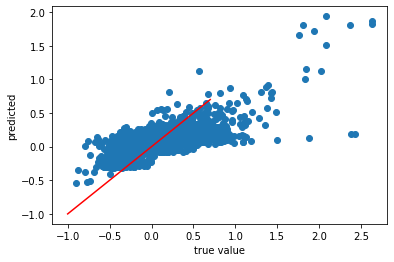

In [130]:
plt.scatter(results_test["y_true"], results_test["y_hat"])
plt.xlabel("true value")
plt.ylabel("predicted")
plt.plot([-1, 0.7], [-1, 0.7], color='red')
plt.show()

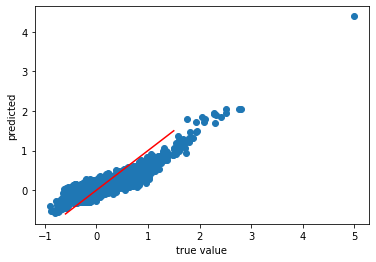

In [131]:
plt.scatter(results_train["y_true"], results_train["y_train_hat"])
plt.xlabel("true value")
plt.ylabel("predicted")
plt.plot([-0.6, 1.5], [-0.6, 1.5], color='red')
plt.show()

Ideally all of the points should be on the red line (slope = 1)

In [ ]:
def train_evaluate_rnn_model(model, X_train: pd.DataFrame, X_test: pd.DataFrame, y_train: pd.DataFrame, y_test: pd.DataFrame, epochs=5, nn_input_size=50, batch_size=32, chosen_y='price_year'):
    y_chosen = chosen_y
    y_train = y_train[[y_chosen]]
    y_test = y_test[[y_chosen]]
    y_test = y_test[:-50]
    Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
    Xscaler.fit(X_train)
    scaled_X_train = Xscaler.transform(X_train)
    scaled_X_test = Xscaler.transform(X_test)

    Yscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that y data is also in 0, 1 range
    Yscaler.fit(y_train)
    scaled_y_train = Yscaler.transform(y_train)

    generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=nn_input_size, batch_size=batch_size)

    model.fit(generator,epochs=epochs)
    test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(X_test)), length=input_size, batch_size=32)
    y_pred_scaled = model.predict(test_generator)
    y_pred = Yscaler.inverse_transform(y_pred_scaled)
    print(y_pred, y_test)
    errors_report = ["1. Root mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False)]
    errors_report.append("2. Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
    errors_report.append("3. R^2: %.2f" % r2_score(y_test, y_pred))
    print(errors_report)
    return errors_report, y_pred, y_test

In [ ]:
y_train, y_test

In [ ]:
n_features= X_train.shape[1]


simple_model = keras.Sequential()
simple_model.add(layers.LSTM(10, activation='relu', input_shape=(input_size, n_features)))
simple_model.add(layers.Dense(1))
simple_model.compile(optimizer='adam', loss='mse')
simple_model.summary()

big_lstm_model = keras.Sequential()
big_lstm_model.add(layers.LSTM(128, activation='relu', input_shape=(input_size, n_features), return_sequences=True))
big_lstm_model.add(layers.LSTM(32, activation='relu', input_shape=(input_size, n_features), return_sequences=True))
big_lstm_model.add(layers.LSTM(8, activation='relu', input_shape=(input_size, n_features)))
big_lstm_model.add(layers.Dense(10))
big_lstm_model.add(layers.Dense(1))
big_lstm_model.compile(optimizer='adam', loss='mse')
big_lstm_model.summary()

chosen_model = big_lstm_model

errors_report, y_pred, y_test = train_evaluate_rnn_model(chosen_model, X_train, X_test, y_train, y_test, epochs=5)
